# Preisbeschreibung der Wohnungen in Boston

[Boston Housing Jupyter Notebook Regression](https://github.com/DavidCico/Boston-House-Prices-With-Regression-Machine-Learning-and-Keras-Deep-Learning/blob/master/Boston_regression_analysis.ipynb)

[Boston Housing Jupyter Notebook Deep Learning](https://github.com/DavidCico/Boston-House-Prices-With-Regression-Machine-Learning-and-Keras-Deep-Learning/blob/master/Boston_deeplearning_regression.ipynb)

## Datensatz laden

In [2]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
print(f"Shape of x_train is {x_train.shape}")
print(f"Shape of x_test is {x_test.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of y_test is {y_test.shape}")

Shape of x_train is (404, 13)
Shape of x_test is (102, 13)
Shape of y_train is (404,)
Shape of y_test is (102,)


## Datensatz visualisieren

[Dokumentation zu Boston Housing Datensatz - Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data)

[Dokumentation zu den Attributen](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data)

| Feature | Description                                              |
|--------|----------------------------------------------------------|
| CRIM    | Per capita crime rate by town                           |
| ZN      | Proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS   | Proportion of non-retail business acres per town        |
| CHAS    | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| NOX     | Nitric oxides concentration (parts per 10 million)      |
| RM      | Average number of rooms per dwelling                    |
| AGE     | Proportion of owner-occupied units built prior to 1940  |
| DIS     | Weighted distances to five Boston employment centres   |
| RAD     | Index of accessibility to radial highways               |
| TAX     | Full-value property-tax rate per 10,000 Dollars                |
| PTRATIO | Pupil-teacher ratio by town                             |
| B       | 1000(Bk - 0.63) where Bk is the proportion of blacks by town |
| LSTAT   | % lower status of the population                        |
| MEDV    | Median value of owner-occupied homes in $1000's         |

![Missmatch Attributes](./images/missmatch_attributes.png)

> Vermutung: Attribut 'B' wurde entfernt

In [16]:
import pandas as pd
x_train_df = pd.DataFrame(x_train, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'])
x_train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'LSTAT'}>],
       [<Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

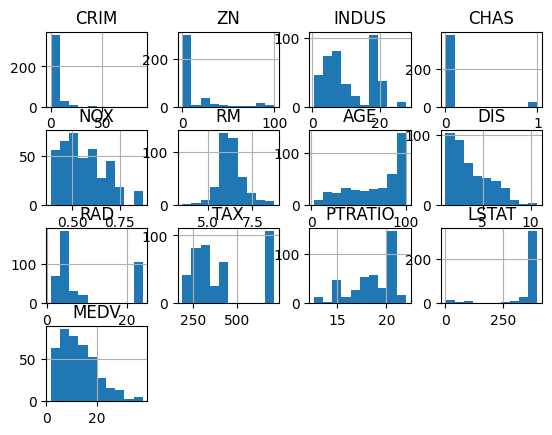

In [17]:
x_train_df.hist()

## Attribute normalisieren (auf Werte 0 - 1)

[Werte normalisieren](https://www.kaggle.com/code/arunkumarramanan/tensorflow-tutorial-and-housing-price-prediction)

In [19]:
import numpy as np
x_train_mean = np.mean(x_train, axis=0)
x_train_std = np.std(x_train, axis=0)
x_train = (x_train - x_train_mean) / x_train_std

In [20]:
x_train

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

## Modell definieren

In [26]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu', input_shape=(13,)))
model.add(tf.keras.layers.Dense(1))

In [28]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 20)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

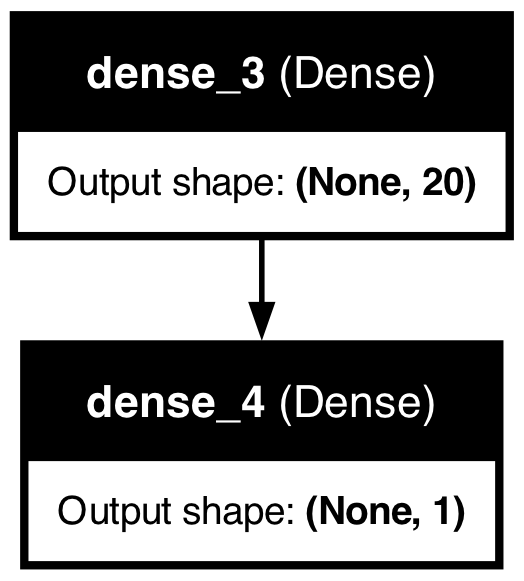

In [29]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

## Model kompilieren

In [30]:
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

## Model trainieren

In [31]:
history = model.fit(x_train, y_train, epochs=20, batch_size=5, validation_split=0.10)

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 603.2722 - mae: 22.7466 - mse: 603.2722 - val_loss: 479.3163 - val_mae: 21.0344 - val_mse: 479.3163
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 610.9367 - mae: 22.7194 - mse: 610.9367 - val_loss: 415.7032 - val_mae: 19.5700 - val_mse: 415.7032
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 459.6971 - mae: 19.8308 - mse: 459.6971 - val_loss: 342.6212 - val_mae: 17.7053 - val_mse: 342.6212
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 341.9370 - mae: 17.0099 - mse: 341.9370 - val_loss: 267.9568 - val_mae: 15.4928 - val_mse: 267.9568
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 326.8370 - mae: 15.9738 - mse: 326.8370 - val_loss: 201.4032 - val_mae: 13.0936 - val_mse: 201.4032
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 233.1010 - mae: 13.1495 - mse: 233.1010 - val_loss: 148.4798 - val_mae: 10.7649 - val_mse: 148.4798
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s

In [33]:
history.history['mae'][19]

3.7969396114349365

## Model evaluieren

Modell MAE (Mean Absolute Error)


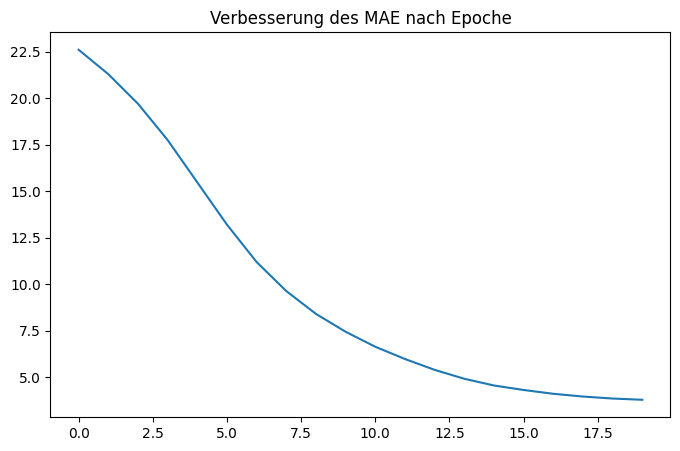

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
print("Modell MAE (Mean Absolute Error)")
pd.DataFrame(history.history)['mae'].plot(figsize=(8, 5))
plt.title("Verbesserung des MAE nach Epoche")
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step


<Axes: >

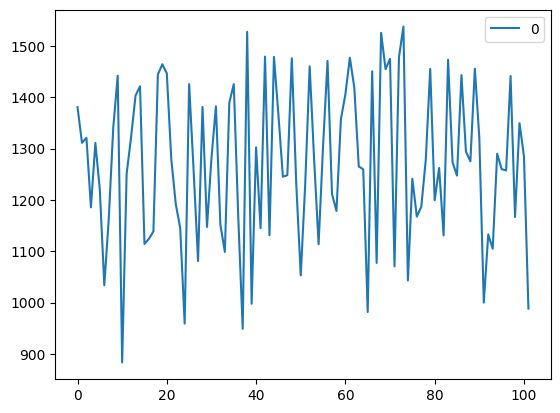

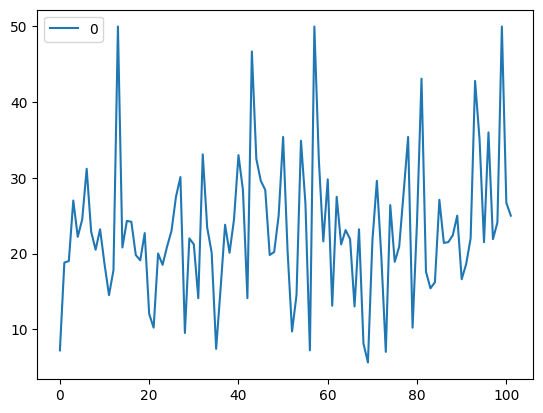

In [51]:
predicted = model.predict(x_test)
actual = y_test

pd.DataFrame(predicted).plot()
pd.DataFrame(actual).plot()

In [38]:
x_test

array([[1.80846e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.72500e+01, 2.90500e+01],
       [1.23290e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.94950e+02, 1.62100e+01],
       [5.49700e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.96900e+02, 9.74000e+00],
       ...,
       [1.83377e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.89610e+02, 1.92000e+00],
       [3.58090e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.91700e+02, 9.71000e+00],
       [2.92400e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.40160e+02, 9.81000e+00]])